$$H_0: \boldsymbol{x} = \boldsymbol{w}\leftrightarrow H_1: \boldsymbol{x} = \boldsymbol{s} + \boldsymbol{w}$$
其中$\boldsymbol{x}\in\mathbb{C}^K$，$\boldsymbol{s}\sim \mathcal{CN}(0,\sigma_s^2\boldsymbol{I}_K)$，$\boldsymbol{w}\sim \mathcal{CN}(0,\sigma_n^2\boldsymbol{I}_K)$，信噪比为$\frac{\sigma_s^2}{\sigma_n^2}$。

不难证明$T(\boldsymbol{x})=\|\boldsymbol{x}\|^2$为上述问题的最优检测器，则$T$的概率密度函数为
\begin{equation}
\begin{aligned}
p_T(t) &= \left\{
    \begin{aligned}
    &p_{\chi^2_{2K}}(t)& \quad H_0\\\
    & p_{(\sigma_s^2+\sigma_n^2)\chi^2_{2K}}(t) & \quad H_1\\
    \end{aligned}
    \right.\\
    &= \left\{
    \begin{aligned}
    &p_{\chi^2_{2K}}(t) & \quad H_0\\\
    & \frac{1}{(\sigma_s^2+\sigma_n^2)} p_{\chi^2_{2K}}\left(\frac{t}{\sigma_s^2+\sigma_n^2}\right) & \quad H_1\\
    \end{aligned}
    \right.\\
\end{aligned}
\end{equation}



检测概率为
$$ P_{d} = 1-F_{\chi_{2K}^2}\left(\frac{\eta}{\sigma_s^2+\sigma_n^2}\right) = 1-F_{\chi_{2K}^2}\left(\frac{F^{-1}_{\chi_{2K}^2}(1-P_{fa})}{\sigma_s^2+\sigma_n^2}\right)$$
其中门限$\eta = F^{-1}_{\chi_{2K}^2}(1-P_{fa}) $

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 参数设置
snr = 1;
pfa = 10 ** np.arange(-6, -0.05, 0.01)  # 伪警报概率（P_fa）
K = 8  # 脉冲数

# 初始化
thresh = np.zeros(len(pfa))
pd = np.zeros(len(pfa))

# 计算阈值和检测概率
for i in range(len(pfa)):
    thresh[i] = chi2.ppf(1 - pfa[i], 2 * K)
    pd[i] = 1 - chi2.cdf(thresh[i] / (1 + snr), 2 * K)

# 绘制结果
plt.figure()
plt.semilogx(pfa, pd, linestyle='-', color='b')
plt.grid(True)
plt.xlabel(r'$P_{fa}$')
plt.ylabel(r'$P_d$')
plt.title('ROC Curve')
plt.show()

# filename = "prf_pd_uncoheret.npz"
# np.savez(filename, pfa=pfa, pd=pd)
# print(f"PRF和PD数据已保存到文件: {filename}")

In [24]:
import numpy as np

# 参数设置
numMc = int(1e5)
K = 8  # 假设 K 的值是 10，根据实际情况修改
thresh = np.arange(0, 158.1, 0.1)

# 随机生成噪声和信号
noi = np.random.randn(numMc, K) + 1j * np.random.randn(numMc, K)
sig = np.random.randn(numMc, K) + 1j * np.random.randn(numMc, K)

# 合成信号
x = sig + noi

# 定义统计函数
def stat(x):
    return np.sum(np.abs(x)**2, axis=1)

# 计算 PFA 和 PD
pfa_comp = np.zeros(len(thresh))
pd_comp = np.zeros(len(thresh))

for i in range(len(thresh)):
    pfa_comp[i] = np.mean(stat(noi) > thresh[i])
    pd_comp[i] = np.mean(stat(x) > thresh[i])



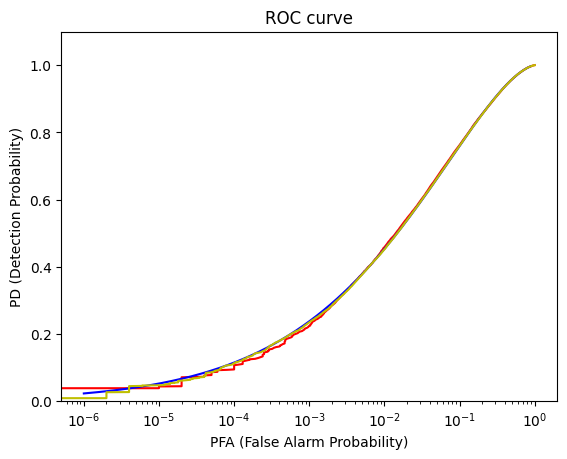

PRF和PD数据已保存到文件: prf_pd_untheory.npz


In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.semilogx(pfa_comp, pd_comp, linestyle='-', color='r')
plt.semilogx(pfa, pd, linestyle='-', color='b')
# 添加标题和标签
plt.title('ROC curve')
plt.xlabel('PFA (False Alarm Probability)')
plt.ylabel('PD (Detection Probability)')
plt.ylim(0, 1.1)

# 显示图表
plt.show()

# 创建文件保存数据PD和PFA
# 将数据保存为 .npz 文件
filename = "prf_pd_untheory.npz"
np.savez(filename, pfa=pfa, pd=pd)
print(f"PRF和PD数据已保存到文件: {filename}")